In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from scipy import stats as stats
import mne
import matplotlib.pyplot as plt
import argparse
from mne.channels import find_ch_adjacency
from mne.stats import combine_adjacency, spatio_temporal_cluster_test
from mne.viz import plot_compare_evokeds
from mne.epochs import equalize_epoch_counts
from mne.minimum_norm import apply_inverse, read_inverse_operator
from mne.stats import spatio_temporal_cluster_1samp_test, summarize_clusters_stc
from mpl_toolkits.axes_grid1 import ImageGrid, inset_locator, make_axes_locatable

# Grand average sensor stuff

In [2]:
from sandbox import grand_average_sensor

Dropped 1 epoch: 48
Dropped 0 epochs: 
Dropped 2 epochs: 44, 46
Dropped 2 epochs: 8, 9
48
48
48
48
Dropped 3 epochs: 43, 44, 47
Dropped 0 epochs: 
Dropped 5 epochs: 43, 44, 45, 46, 47
Dropped 5 epochs: 27, 28, 29, 35, 47
45
45
45
45
Dropped 3 epochs: 42, 43, 44
Dropped 0 epochs: 
Dropped 6 epochs: 42, 43, 44, 45, 46, 47
Dropped 6 epochs: 1, 10, 12, 40, 41, 47
44
44
44
44
Dropped 1 epoch: 41
Dropped 0 epochs: 
Dropped 7 epochs: 41, 42, 43, 44, 45, 46, 47
Dropped 7 epochs: 2, 3, 5, 9, 41, 45, 47
43
43
43
43
Dropped 0 epochs: 
Dropped 4 epochs: 0, 7, 9, 10
Dropped 16 epochs: 0, 2, 4, 5, 7, 8, 10, 15, 17, 18, 19, 22, 23, 41, 48, 49
Dropped 16 epochs: 0, 2, 3, 5, 9, 11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24
34
34
34
34
Dropped 1 epoch: 41
Dropped 0 epochs: 
Dropped 7 epochs: 41, 42, 43, 44, 45, 46, 47
Dropped 7 epochs: 2, 3, 5, 10, 45, 46, 47
43
43
43
43
Dropped 9 epochs: 28, 29, 35, 37, 38, 39, 40, 41, 45
Dropped 0 epochs: 
Dropped 13 epochs: 28, 30, 31, 32, 33, 35, 37, 38, 40, 42, 43, 44

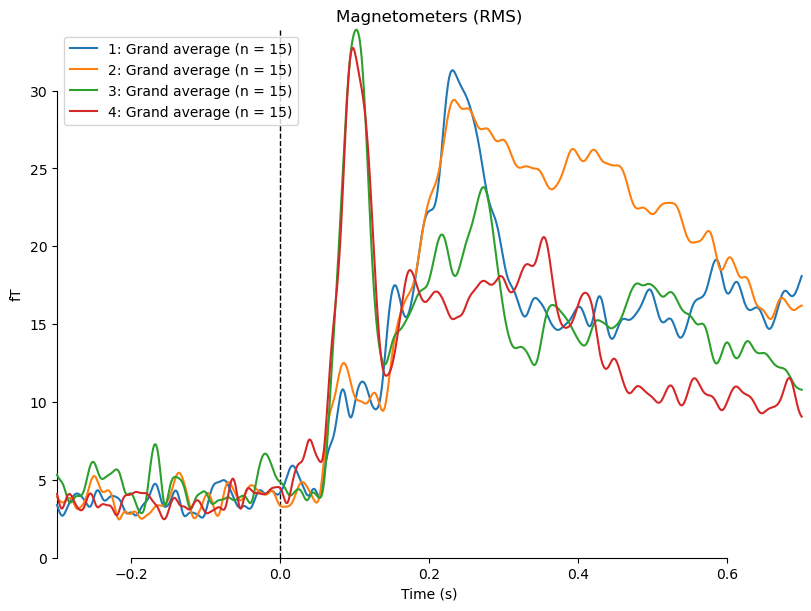

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


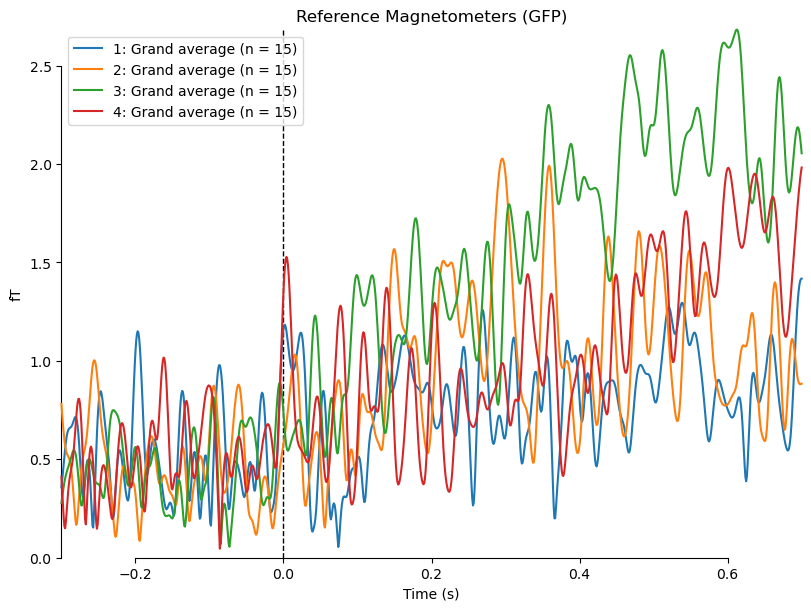

In [3]:
prod_ident, prod_unrel, comp_ident, comp_unrel = grand_average_sensor()
conditions = [prod_ident, prod_unrel, comp_ident, comp_unrel]


# Field Map Difference Plots

In [11]:
comp_dif = mne.combine_evoked([comp_unrel, comp_ident], weights = [1, -1])
prod_dif = mne.combine_evoked([prod_unrel, prod_ident], weights = [1,-1])

maps = mne.make_field_map(comp_dif, trans='fsaverage', ch_type='meg')
comp_dif.plot_field(maps, time = 0.1)

Getting helmet for system KIT (derived from 157 MEG channel locations)
Prepare MEG mapping...
Computing dot products for 157 coils...
Computing dot products for 135 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 51/157 components to omit less than 0.0001 (9.3e-05)


In [12]:
maps = mne.make_field_map(prod_dif, trans='fsaverage', ch_type='meg')
prod_dif.plot_field(maps, time =0.1)

Getting helmet for system KIT (derived from 157 MEG channel locations)
Prepare MEG mapping...
Computing dot products for 157 coils...
Computing dot products for 135 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 50/157 components to omit less than 0.0001 (9.3e-05)


# Getting sensor positions

In [6]:
# left posterior
left_post_numbers = [4,5,6,7,8,9,34,36,37,38,40,45,47,48,49,50,75,76,77,79,87,88,90,127,129,137]
#left 46 out
left_post = []
for i in left_post_numbers:
    title = ""
    if i < 10:
        title = 'MEG 00' + str(i)
    elif 10 <= i < 100:
        title = 'MEG 0' + str(i)
    else:
        title = 'MEG ' + str(i)
    left_post.append(title)

#left anterior
left_ant_numbers = [1,2,3,39,41,42,43,44,52,58,67,71,80,82,83,84,85,108,130,131,132,133,134,135,136,151]
left_ant = []

for i in left_ant_numbers:
    title = ""
    if i < 10:
        title = 'MEG 00' + str(i)
    elif 10 <= i < 100:
        title = 'MEG 0' + str(i)
    else:
        title = 'MEG ' + str(i)
    left_ant.append(title)

#right posterior
right_post_numbers = [14, 15,16,17,18,19,25,27,28,30,53,54,56,57,66,68,69,70,94,96,97,119,121,122,143]
right_post = []
for i in right_post_numbers:
    title = ""
    if i < 10:
        title = 'MEG 00' + str(i)
    elif 10 <= i < 100:
        title = 'MEG 0' + str(i)
    else:
        title = 'MEG ' + str(i)
    right_post.append(title)

#right anterior
right_ant_numbers = [20,21,22,23,24,26,59,60,61,63,65,89,92,95,99,100,114,115,116,117,118,145,147,148,152,155]
right_ant = []
for i in right_ant_numbers:
    title = ""
    if i < 10:
        title = 'MEG 00' + str(i)
    elif 10 <= i < 100:
        title = 'MEG 0' + str(i)
    else:
        title = 'MEG ' + str(i)
    right_ant.append(title)

# Plotting sensor locations

Opening raw data file /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif...
    Range : 0 ... 726999 =      0.000 ...   726.999 secs
Ready.
Reading 0 ... 726999  =      0.000 ...   726.999 secs...


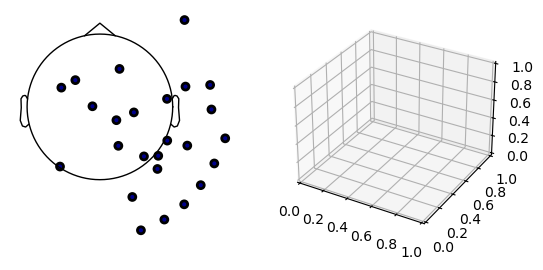

In [24]:
# plotting sensor locations
raw = mne.io.read_raw_fif('/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif', preload=True)
raw_post = raw.pick(right_post)
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection="3d")
raw_post.plot_sensors(ch_type="mag", axes=ax2d)
raw_post.plot_sensors(ch_type="mag", axes=ax3d, kind="3d")
ax3d.view_init(azim=70, elev=15)

Opening raw data file /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif...
    Range : 0 ... 726999 =      0.000 ...   726.999 secs
Ready.
Reading 0 ... 726999  =      0.000 ...   726.999 secs...


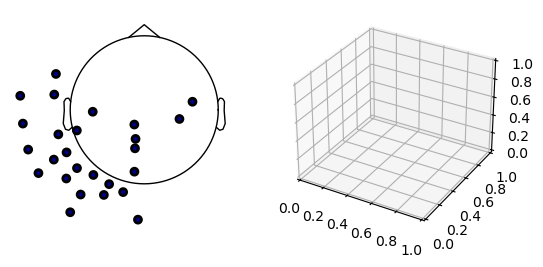

In [25]:
raw = mne.io.read_raw_fif('/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif', preload=True)
raw_post = raw.pick(left_post)
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection="3d")
raw_post.plot_sensors(ch_type="mag", axes=ax2d)
raw_post.plot_sensors(ch_type="mag", axes=ax3d, kind="3d")
ax3d.view_init(azim=70, elev=15)

Opening raw data file /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif...
    Range : 0 ... 726999 =      0.000 ...   726.999 secs
Ready.
Reading 0 ... 726999  =      0.000 ...   726.999 secs...


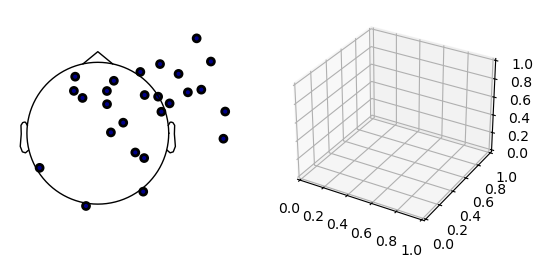

In [26]:
raw = mne.io.read_raw_fif('/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif', preload=True)
raw_ant = raw.pick(right_ant)
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection="3d")
raw_ant.plot_sensors(ch_type="mag", axes=ax2d)
raw_ant.plot_sensors(ch_type="mag", axes=ax3d, kind="3d")
ax3d.view_init(azim=70, elev=15)

Opening raw data file /Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif...
    Range : 0 ... 726999 =      0.000 ...   726.999 secs
Ready.
Reading 0 ... 726999  =      0.000 ...   726.999 secs...


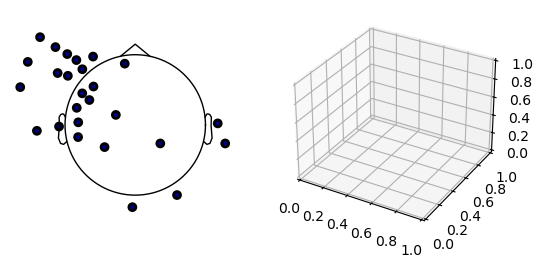

In [29]:
raw = mne.io.read_raw_fif('/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp-raw.fif', preload=True)
raw_ant = raw.pick(left_ant)
fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection="3d")
raw_ant.plot_sensors(ch_type="mag", axes=ax2d)
raw_ant.plot_sensors(ch_type="mag", axes=ax3d, kind="3d")
ax3d.view_init(azim=70, elev=15)

# Plotting ROIS

More than 6 channels, truncating title ...
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
More than 6 channels, truncating title ...
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
More than 6 channels, truncating title ...
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
More than 6 channels, truncating title ...
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


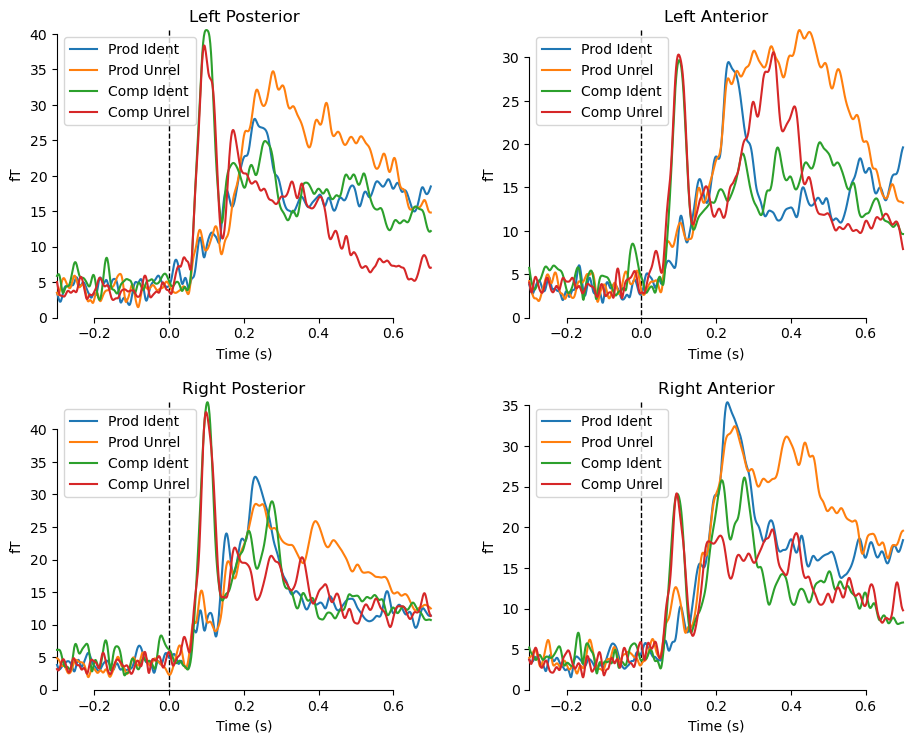

In [14]:
# Create label → Evoked mapping
evokeds_dict = {
    "Prod Ident": prod_ident,
    "Prod Unrel": prod_unrel,
    "Comp Ident": comp_ident,
    "Comp Unrel": comp_unrel
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout(pad=4.0)

# Top-left
mne.viz.plot_compare_evokeds(
    evokeds_dict,
    picks=left_post,
    axes=axes[0, 0],
    show=False
)
axes[0, 0].set_title("Left Posterior")

# Top-right
mne.viz.plot_compare_evokeds(
    evokeds_dict,
    picks=left_ant,
    axes=axes[0, 1],
    show=False
)
axes[0, 1].set_title("Left Anterior")

# Bottom-left
mne.viz.plot_compare_evokeds(
    evokeds_dict,
    picks=right_post,
    axes=axes[1, 0],
    show=False
)
axes[1, 0].set_title("Right Posterior")

# Bottom-right
mne.viz.plot_compare_evokeds(
    evokeds_dict,
    picks=right_ant,
    axes=axes[1, 1],
    show=False
)
axes[1, 1].set_title("Right Anterior")

plt.show()


# Statistics on sensor subsets within conditions


In [60]:
def statistics_sensor(picks, numbers):
    subs = ['R3250', 'R3254', 'R3261', 'R3264', 'R3270','R3271','R3272','R3273','R3275','R3277','R3279','R3285','R3286','R3289','R3290']

    ident_prod_evokeds = []
    unrel_prod_evokeds = []
    ident_comp_evokeds = []
    unrel_comp_evokeds = []

    #Load the evoked data to arrays by condition
    for sub in subs:
        directory = '/Users/admin/Box Sync/Starling/Experiment1/MEG_data/' + sub + '/'
        tmin=0.3
        tmax=0.7

        #Load all epoched data
        prod_fname = directory + sub + '_prod_TEST-epo.fif'
        epochs_prod = mne.read_epochs(prod_fname, preload =True, verbose=False)
        comp_fname = directory + sub + '_comp_TEST-epo.fif'
        epochs_comp = mne.read_epochs(comp_fname, preload = True, verbose=False)

        ident_prod = epochs_prod['production identical']
        unrel_prod = epochs_prod['production unrelated']
        ident_comp = epochs_comp['comprehension identical']
        unrel_comp = epochs_comp['comprehension unrelated']

        mne.epochs.equalize_epoch_counts([ident_prod, unrel_prod, ident_comp, unrel_comp], method = 'random')

        ident_prod_evokeds.append(ident_prod.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        unrel_prod_evokeds.append(unrel_prod.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        ident_comp_evokeds.append(ident_comp.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        unrel_comp_evokeds.append(unrel_comp.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))


    #Grand average the evoked data (for plotting)
    ident_prod_ga = mne.grand_average(ident_prod_evokeds)
    unrel_prod_ga = mne.grand_average(unrel_prod_evokeds)
    ident_comp_ga = mne.grand_average(ident_comp_evokeds)
    unrel_comp_ga = mne.grand_average(unrel_comp_evokeds)

    # PRODUCTION
    #Conduct the test for production, with test only run for tmin to tmax time window
    prod_ident_data = np.stack([x.get_data(picks=picks, tmin=tmin, tmax=tmax) for x in ident_prod_evokeds], axis=0)
    prod_unrel_data = np.stack([x.get_data(picks=picks, tmin=tmin, tmax=tmax) for x in unrel_prod_evokeds], axis=0)

    del ident_prod_evokeds, unrel_prod_evokeds

    #X shape: (# of conditions, # of trials/subjects, # of timepoints, # of channels)
    X = np.stack([prod_ident_data, prod_unrel_data])
    X = [np.transpose(x, (0,2,1)) for x in X]

    adjacency, ch_names = find_ch_adjacency(ident_prod_ga.info, ch_type = 'mag')

    adjacency = adjacency[np.ix_(numbers,numbers)]

    # RUNNING THE TEST
    #Set parameters
    tail = 1
    alpha_cluster_forming = 0.1
    n_conditions = 2
    n_observations = len(X[0])
    dfn = n_conditions - 1
    dfd = n_observations - n_conditions
    f_thresh = stats.f.ppf(1-alpha_cluster_forming, dfn=dfn, dfd=dfd)

    #Run test
    cluster_stats = spatio_temporal_cluster_test(X, n_permutations=1000, threshold=f_thresh, tail=tail,
                                                 adjacency=adjacency) #, step_down_p=0.1
    F_obs, clusters, p_values, _ = cluster_stats
    print(p_values)
    p_accept = 0.4
    good_cluster_inds = np.where(p_values < p_accept)[0]
    print(good_cluster_inds)

    evokeds = {"Production Identical": ident_prod_ga, "Production Unrelated": unrel_prod_ga}

    #Plot "significant" clusters (< p_accept)
    for i_clu, clu_idx in enumerate(good_cluster_inds):
        #obtain indeces
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)
        f_map = F_obs[time_inds, ...].mean(axis=0)
        sig_times = ident_prod_ga.times[time_inds + 600]


        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True  # ADDED

        fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout='constrained')
        # epochs_prod_temp = ident_prod_ga.pick(picks='mag')

        #Plot topographic map of F values
        f_evoked = mne.EvokedArray(f_map[:, np.newaxis], ident_prod_ga.pick(picks='mag').info, tmin=0)
        f_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            cmap='Reds',
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params = dict(markersize=10)  # ADDED
        )
        image = ax_topo.images[0]
        ax_topo.set_title("")
        # create additional axes (for ERF and colorbar)
        divider = make_axes_locatable(ax_topo)
        # add axes for colorbar
        ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(image, cax=ax_colorbar)
        ax_topo.set_xlabel(
            "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
        )

        #Plot timecourse of significant cluster
        ax_signals = divider.append_axes("right", size="300%", pad=1.2)
        title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
        if len(ch_inds) > 1:
            title += "s (mean) with p value " + str(p_values[clu_idx])
        plot_compare_evokeds(
            evokeds,
            title=title,
            picks=ch_inds,
            axes=ax_signals,
            show=False,
            split_legend=True,
            truncate_yaxis="auto",
        )
        # plot temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()
        ax_signals.fill_betweenx(
            (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
        )
    plt.show()


    # COMPREHENSION

    comp_ident_data = np.stack([x.get_data(picks=picks,tmin=tmin, tmax=tmax) for x in ident_comp_evokeds], axis = 0)
    comp_unrel_data = np.stack([x.get_data(picks=picks,tmin=tmin, tmax=tmax) for x in unrel_comp_evokeds], axis = 0)

    del ident_comp_evokeds, unrel_comp_evokeds

    X = np.stack([comp_ident_data, comp_unrel_data])
    X = [np.transpose(x, (0,2,1)) for x in X]

    del comp_ident_data, comp_unrel_data

    # comp_fname = '/Users/admin/Box Sync/Starling/Experiment1/MEG_data/R3250/R3250_comp_TEST-epo.fif'
    # sample_comp = mne.read_epochs(comp_fname, preload=True)
    adjacency, ch_names = find_ch_adjacency(ident_comp_ga.info, ch_type='mag')
    adjacency = adjacency[np.ix_(numbers,numbers)]

    # RUNNING THE TEST

    tail = 1
    alpha_cluster_forming = 0.1
    n_conditions = 2  # was 4
    n_observations = len(X[0])
    dfn = n_conditions - 1
    dfd = n_observations - n_conditions

    f_thresh = stats.f.ppf(1 - alpha_cluster_forming, dfn=dfn, dfd=dfd)

    cluster_stats = spatio_temporal_cluster_test(X, n_permutations=1000, threshold=f_thresh, tail=tail,
                                                 adjacency=adjacency)

    F_obs, clusters, p_values, _ = cluster_stats
    print(p_values)
    p_accept = 0.4
    good_cluster_inds = np.where(p_values < p_accept)[0]
    print(good_cluster_inds)
    evokeds = {"Comprehension Identical": ident_comp_ga, "Comprehension Unrelated": unrel_comp_ga}

    for i_clu, clu_idx in enumerate(good_cluster_inds):
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)

        f_map = F_obs[time_inds, ...].mean(axis=0)

        sig_times = ident_comp_ga.times[time_inds + 600]

        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True  # ADDED

        fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout='constrained')

        epochs_comp_temp = ident_comp_ga.pick(picks='mag')
        f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs_comp_temp.info, tmin=0)
        f_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            cmap='Reds',
            vlim=(np.min, np.max),
            show=False,
            colorbar=False
        )
        image = ax_topo.images[0]
        ax_topo.set_title("")
        # create additional axes (for ERF and colorbar)
        divider = make_axes_locatable(ax_topo)
        # add axes for colorbar
        ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(image, cax=ax_colorbar)
        ax_topo.set_xlabel(
            "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
        )
        # add new axis for time courses and plot time courses
        ax_signals = divider.append_axes("right", size="300%", pad=1.2)
        title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
        if len(ch_inds) > 1:
            title += "s (mean) with p value " + str(p_values[clu_idx])
        plot_compare_evokeds(
            evokeds,
            title=title,
            picks=ch_inds,
            axes=ax_signals,
            show=False,
            split_legend=True,
            truncate_yaxis="auto",
        )

        # plot temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()
        ax_signals.fill_betweenx(
            (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
        )
    plt.show()

# Statistics on sensor subsets between conditions

In [69]:
def statistics_sensor_across(picks, numbers):
    subs = ['R3250', 'R3254', 'R3261', 'R3264', 'R3270','R3271','R3272','R3273','R3275','R3277','R3279','R3285','R3286','R3289','R3290']

    ident_prod_evokeds = []
    unrel_prod_evokeds = []
    ident_comp_evokeds = []
    unrel_comp_evokeds = []

    #Load the evoked data to arrays by condition
    for sub in subs:
        directory = '/Users/admin/Box Sync/Starling/Experiment1/MEG_data/' + sub + '/'
        tmin=0.3
        tmax=0.7

        #Load all epoched data
        prod_fname = directory + sub + '_prod_TEST-epo.fif'
        epochs_prod = mne.read_epochs(prod_fname, preload =True, verbose=False)
        comp_fname = directory + sub + '_comp_TEST-epo.fif'
        epochs_comp = mne.read_epochs(comp_fname, preload = True, verbose=False)

        ident_prod = epochs_prod['production identical']
        unrel_prod = epochs_prod['production unrelated']
        ident_comp = epochs_comp['comprehension identical']
        unrel_comp = epochs_comp['comprehension unrelated']

        mne.epochs.equalize_epoch_counts([ident_prod, unrel_prod, ident_comp, unrel_comp], method = 'random')

        ident_prod_evokeds.append(ident_prod.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        unrel_prod_evokeds.append(unrel_prod.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        ident_comp_evokeds.append(ident_comp.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))
        unrel_comp_evokeds.append(unrel_comp.average(picks=picks).filter(l_freq=0, h_freq=40, verbose=False))


    #Grand average the evoked data (for plotting)
    ident_prod_ga = mne.grand_average(ident_prod_evokeds)
    unrel_prod_ga = mne.grand_average(unrel_prod_evokeds)
    ident_comp_ga = mne.grand_average(ident_comp_evokeds)
    unrel_comp_ga = mne.grand_average(unrel_comp_evokeds)

    # Priming
    #Conduct the test for production, with test only run for tmin to tmax time window
    prod_ident_data = np.stack([x.get_data(picks=picks, tmin=tmin, tmax=tmax) for x in ident_prod_evokeds], axis=0)
    comp_ident_data = np.stack([x.get_data(picks=picks, tmin=tmin, tmax=tmax) for x in ident_comp_evokeds], axis=0)

    del ident_prod_evokeds, unrel_prod_evokeds

    #X shape: (# of conditions, # of trials/subjects, # of timepoints, # of channels)
    X = np.stack([prod_ident_data, comp_ident_data])
    X = [np.transpose(x, (0,2,1)) for x in X]

    adjacency, ch_names = find_ch_adjacency(ident_prod_ga.info, ch_type = 'mag')

    adjacency = adjacency[np.ix_(numbers,numbers)]

    # RUNNING THE TEST
    #Set parameters
    tail = 1
    alpha_cluster_forming = 0.1
    n_conditions = 2
    n_observations = len(X[0])
    dfn = n_conditions - 1
    dfd = n_observations - n_conditions
    f_thresh = stats.f.ppf(1-alpha_cluster_forming, dfn=dfn, dfd=dfd)

    #Run test
    cluster_stats = spatio_temporal_cluster_test(X, n_permutations=1000, threshold=f_thresh, tail=tail,
                                                 adjacency=adjacency) #, step_down_p=0.1
    F_obs, clusters, p_values, _ = cluster_stats
    print(p_values)
    p_accept = 0.4
    good_cluster_inds = np.where(p_values < p_accept)[0]
    print(good_cluster_inds)

    evokeds = {"Production Identical": ident_prod_ga, "Comprehension Identical": ident_comp_ga}

    #Plot "significant" clusters (< p_accept)
    for i_clu, clu_idx in enumerate(good_cluster_inds):
        #obtain indeces
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)
        f_map = F_obs[time_inds, ...].mean(axis=0)
        sig_times = ident_prod_ga.times[time_inds + 600]


        mask = np.zeros((f_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True  # ADDED

        fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout='constrained')
        # epochs_prod_temp = ident_prod_ga.pick(picks='mag')

        #Plot topographic map of F values
        f_evoked = mne.EvokedArray(f_map[:, np.newaxis], ident_prod_ga.pick(picks='mag').info, tmin=0)
        f_evoked.plot_topomap(
            times=0,
            mask=mask,
            axes=ax_topo,
            cmap='Reds',
            vlim=(np.min, np.max),
            show=False,
            colorbar=False,
            mask_params = dict(markersize=10)  # ADDED
        )
        image = ax_topo.images[0]
        ax_topo.set_title("")
        # create additional axes (for ERF and colorbar)
        divider = make_axes_locatable(ax_topo)
        # add axes for colorbar
        ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(image, cax=ax_colorbar)
        ax_topo.set_xlabel(
            "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
        )

        #Plot timecourse of significant cluster
        ax_signals = divider.append_axes("right", size="300%", pad=1.2)
        title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
        if len(ch_inds) > 1:
            title += "s (mean) with p value " + str(p_values[clu_idx])
        plot_compare_evokeds(
            evokeds,
            title=title,
            picks=ch_inds,
            axes=ax_signals,
            show=False,
            split_legend=True,
            truncate_yaxis="auto",
        )
        # plot temporal cluster extent
        ymin, ymax = ax_signals.get_ylim()
        ax_signals.fill_betweenx(
            (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
        )
    plt.show()


Dropped 1 epoch: 7
Dropped 0 epochs: 
Dropped 2 epochs: 4, 49
Dropped 2 epochs: 4, 48
Dropped 3 epochs: 7, 13, 18
Dropped 0 epochs: 
Dropped 5 epochs: 9, 14, 16, 17, 34
Dropped 5 epochs: 3, 20, 24, 36, 48
Dropped 3 epochs: 5, 27, 31
Dropped 0 epochs: 
Dropped 6 epochs: 3, 20, 23, 25, 30, 42
Dropped 6 epochs: 13, 31, 33, 34, 41, 48
Dropped 1 epoch: 18
Dropped 0 epochs: 
Dropped 7 epochs: 2, 5, 25, 26, 27, 41, 46
Dropped 7 epochs: 1, 4, 8, 12, 13, 14, 26
Dropped 0 epochs: 
Dropped 4 epochs: 7, 16, 20, 23
Dropped 16 epochs: 2, 10, 13, 16, 17, 22, 23, 24, 27, 31, 32, 33, 38, 42, 46, 48
Dropped 16 epochs: 0, 1, 2, 3, 6, 7, 12, 13, 19, 21, 22, 32, 34, 35, 37, 46
Dropped 1 epoch: 1
Dropped 0 epochs: 
Dropped 7 epochs: 10, 20, 26, 28, 31, 39, 41
Dropped 7 epochs: 2, 8, 9, 15, 21, 25, 46
Dropped 9 epochs: 2, 4, 9, 21, 26, 30, 38, 44, 45
Dropped 0 epochs: 
Dropped 13 epochs: 1, 3, 4, 8, 14, 21, 22, 26, 28, 32, 34, 40, 49
Dropped 13 epochs: 2, 3, 8, 15, 16, 19, 20, 23, 25, 28, 38, 41, 46
Dropped 

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.415 0.717 0.919 0.963 0.67  0.994 0.951 0.968 0.963 1.    0.318 0.986
 0.401 0.867 0.992 0.948 0.976 0.953 0.994 0.915 0.968 0.994 0.981 0.994
 0.929 0.927 0.982 0.987 0.996]
[10]
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


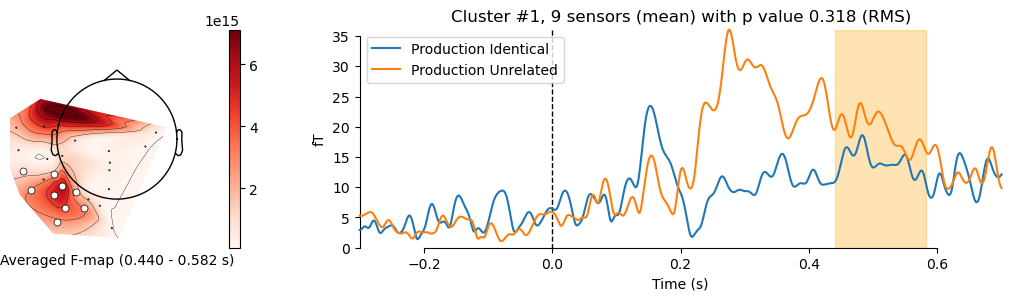

Reading adjacency matrix for KIT-UMD-4.
stat_fun(H1): min=2.4431659550668378e-08 max=11.835857716352697
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.718 0.891 1.    0.854 1.    1.    0.83  0.509 0.987 1.    1.    0.999
 0.718 0.708 0.999 0.619 0.598 0.971 0.906 1.    0.999 0.995 0.714 0.997]
[]


In [62]:
statistics_sensor(left_post, left_post_numbers)

Dropped 1 epoch: 44
Dropped 0 epochs: 
Dropped 2 epochs: 24, 27
Dropped 2 epochs: 28, 47
Dropped 3 epochs: 1, 19, 36
Dropped 0 epochs: 
Dropped 5 epochs: 13, 14, 25, 37, 45
Dropped 5 epochs: 6, 8, 9, 26, 34
Dropped 3 epochs: 8, 13, 20
Dropped 0 epochs: 
Dropped 6 epochs: 5, 7, 18, 27, 31, 47
Dropped 6 epochs: 1, 5, 8, 12, 27, 40
Dropped 1 epoch: 24
Dropped 0 epochs: 
Dropped 7 epochs: 5, 7, 8, 17, 22, 42, 43
Dropped 7 epochs: 17, 18, 31, 34, 35, 37, 39
Dropped 0 epochs: 
Dropped 4 epochs: 9, 18, 28, 32
Dropped 16 epochs: 1, 2, 4, 6, 8, 10, 12, 13, 21, 25, 28, 29, 33, 35, 38, 43
Dropped 16 epochs: 1, 7, 10, 16, 18, 22, 24, 25, 26, 27, 28, 32, 35, 44, 47, 49
Dropped 1 epoch: 22
Dropped 0 epochs: 
Dropped 7 epochs: 4, 7, 11, 16, 19, 41, 46
Dropped 7 epochs: 12, 22, 23, 25, 32, 40, 46
Dropped 9 epochs: 0, 15, 16, 25, 28, 29, 35, 37, 40
Dropped 0 epochs: 
Dropped 13 epochs: 2, 8, 9, 15, 16, 23, 27, 34, 37, 38, 45, 47, 49
Dropped 13 epochs: 1, 2, 8, 10, 17, 18, 19, 20, 21, 23, 37, 45, 48
Dro

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.032 0.993 0.994 0.564 0.766]
[0]
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


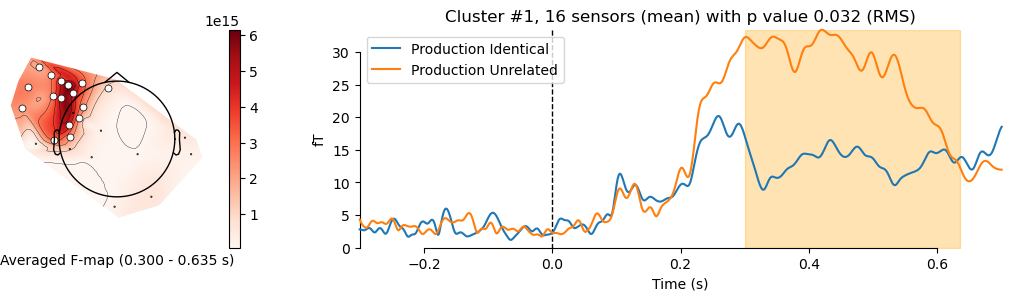

Reading adjacency matrix for KIT-UMD-4.
stat_fun(H1): min=1.59604749089125e-09 max=13.284776668859907
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.096 1.    0.984 1.    0.994 0.999 0.999 1.    1.    1.    0.722 1.
 1.   ]
[0]
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


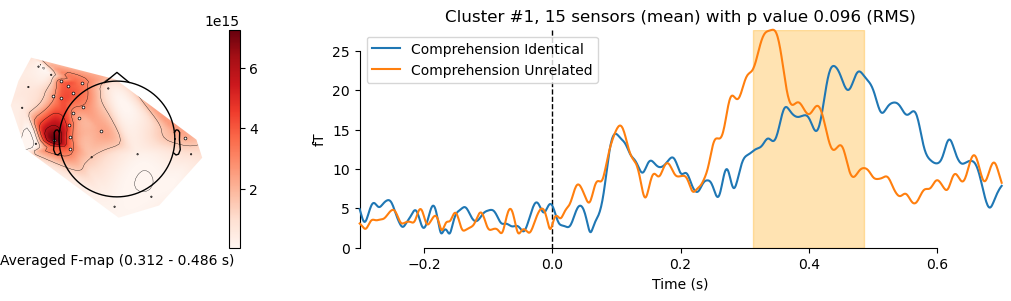

In [61]:
statistics_sensor(left_ant, left_ant_numbers)

Dropped 1 epoch: 8
Dropped 0 epochs: 
Dropped 2 epochs: 1, 14
Dropped 2 epochs: 3, 31
Dropped 3 epochs: 14, 20, 33
Dropped 0 epochs: 
Dropped 5 epochs: 6, 7, 16, 18, 30
Dropped 5 epochs: 0, 10, 11, 16, 25
Dropped 3 epochs: 0, 36, 42
Dropped 0 epochs: 
Dropped 6 epochs: 8, 9, 14, 20, 30, 45
Dropped 6 epochs: 6, 21, 28, 32, 35, 49
Dropped 1 epoch: 4
Dropped 0 epochs: 
Dropped 7 epochs: 12, 19, 21, 23, 24, 27, 31
Dropped 7 epochs: 4, 6, 20, 21, 25, 31, 48
Dropped 0 epochs: 
Dropped 4 epochs: 9, 17, 20, 23
Dropped 16 epochs: 1, 3, 9, 18, 22, 24, 26, 32, 35, 37, 39, 43, 45, 46, 47, 49
Dropped 16 epochs: 0, 4, 7, 12, 18, 20, 21, 22, 29, 31, 32, 36, 37, 40, 42, 44
Dropped 1 epoch: 9
Dropped 0 epochs: 
Dropped 7 epochs: 0, 20, 21, 25, 29, 32, 40
Dropped 7 epochs: 1, 5, 9, 10, 11, 32, 35
Dropped 9 epochs: 5, 8, 11, 13, 19, 27, 36, 40, 42
Dropped 0 epochs: 
Dropped 13 epochs: 0, 3, 17, 21, 23, 25, 26, 30, 32, 35, 40, 41, 47
Dropped 13 epochs: 13, 14, 16, 17, 19, 23, 25, 26, 34, 40, 42, 43, 45
Dr

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.999 0.624 0.91  0.991 1.    0.991 0.995 0.961 0.956]
[]
Reading adjacency matrix for KIT-UMD-4.
stat_fun(H1): min=3.842349271076514e-09 max=11.655935721688866
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.992 0.118 0.985 0.99  0.999 0.999 0.998 0.802 0.99  0.999 1.    0.999]
[1]
combining channels using RMS (mag channels)
combining channels using RMS (mag channels)


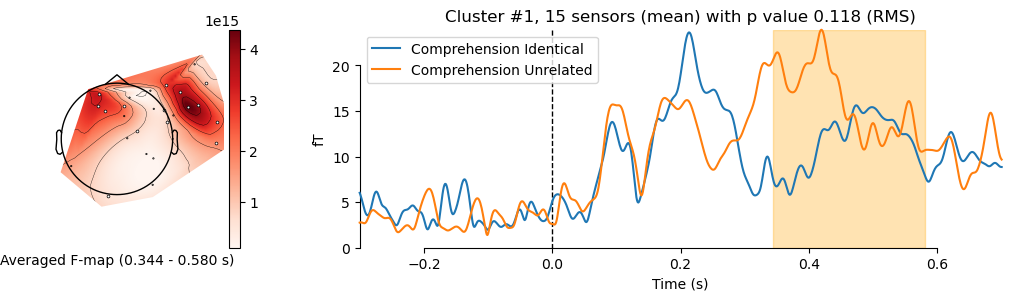

In [63]:
statistics_sensor(right_ant, right_ant_numbers)

In [64]:
statistics_sensor(right_post, right_post_numbers)

Dropped 1 epoch: 33
Dropped 0 epochs: 
Dropped 2 epochs: 12, 39
Dropped 2 epochs: 14, 34
Dropped 3 epochs: 4, 29, 39
Dropped 0 epochs: 
Dropped 5 epochs: 2, 13, 21, 33, 48
Dropped 5 epochs: 10, 16, 17, 32, 46
Dropped 3 epochs: 8, 9, 45
Dropped 0 epochs: 
Dropped 6 epochs: 1, 11, 24, 26, 33, 41
Dropped 6 epochs: 11, 17, 18, 27, 40, 41
Dropped 1 epoch: 12
Dropped 0 epochs: 
Dropped 7 epochs: 7, 17, 22, 23, 29, 44, 46
Dropped 7 epochs: 9, 10, 11, 17, 19, 31, 47
Dropped 0 epochs: 
Dropped 4 epochs: 15, 23, 31, 32
Dropped 16 epochs: 0, 3, 5, 8, 9, 10, 13, 20, 22, 24, 25, 31, 38, 40, 41, 44
Dropped 16 epochs: 4, 7, 11, 13, 15, 16, 22, 24, 29, 30, 31, 34, 35, 38, 45, 47
Dropped 1 epoch: 2
Dropped 0 epochs: 
Dropped 7 epochs: 9, 27, 29, 43, 44, 46, 48
Dropped 7 epochs: 8, 25, 28, 39, 42, 44, 45
Dropped 9 epochs: 0, 8, 23, 24, 26, 31, 36, 37, 44
Dropped 0 epochs: 
Dropped 13 epochs: 4, 6, 15, 21, 28, 29, 35, 37, 43, 44, 46, 47, 49
Dropped 13 epochs: 3, 4, 11, 12, 16, 20, 26, 30, 32, 35, 42, 44,

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.777 0.996 0.89  0.997 0.993 0.963 0.983 0.983 0.997 0.997 0.981 0.997]
[]
Reading adjacency matrix for KIT-UMD-4.
stat_fun(H1): min=1.1851548191952364e-12 max=9.353574005012808
Running initial clustering …
Found 18 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[1.    0.989 0.983 0.989 1.    0.998 0.962 0.997 0.971 1.    1.    1.
 0.962 0.998 0.984 0.988 0.915 0.991]
[]


In [67]:
statistics_sensor_across(left_post, left_post_numbers)

Dropped 1 epoch: 16
Dropped 0 epochs: 
Dropped 2 epochs: 16, 29
Dropped 2 epochs: 6, 18
Dropped 3 epochs: 2, 9, 35
Dropped 0 epochs: 
Dropped 5 epochs: 2, 31, 40, 41, 44
Dropped 5 epochs: 3, 9, 13, 30, 45
Dropped 3 epochs: 16, 45, 46
Dropped 0 epochs: 
Dropped 6 epochs: 1, 2, 9, 29, 45, 46
Dropped 6 epochs: 16, 20, 24, 27, 44, 45
Dropped 1 epoch: 18
Dropped 0 epochs: 
Dropped 7 epochs: 8, 13, 14, 17, 24, 36, 39
Dropped 7 epochs: 8, 11, 16, 18, 19, 21, 24
Dropped 0 epochs: 
Dropped 4 epochs: 3, 14, 32, 33
Dropped 16 epochs: 7, 8, 9, 14, 15, 17, 18, 21, 22, 24, 26, 31, 37, 43, 44, 45
Dropped 16 epochs: 0, 4, 5, 10, 11, 13, 15, 17, 22, 24, 28, 31, 35, 37, 38, 40
Dropped 1 epoch: 10
Dropped 0 epochs: 
Dropped 7 epochs: 1, 7, 8, 14, 38, 44, 48
Dropped 7 epochs: 0, 6, 8, 13, 22, 24, 44
Dropped 9 epochs: 13, 14, 17, 21, 29, 31, 32, 34, 35
Dropped 0 epochs: 
Dropped 13 epochs: 4, 10, 11, 12, 14, 19, 28, 33, 36, 38, 39, 43, 49
Dropped 13 epochs: 5, 11, 14, 19, 20, 23, 25, 26, 29, 31, 37, 41, 43

  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

[0.944 0.999 0.637 0.986 0.99  0.997 0.981 0.996 0.996 0.999]
[]


# Mean difference bar graphs

In [90]:
# prod_ident, prod_unrel, comp_ident, comp_unrel = grand_average_sensor()
# conditions = [prod_ident, prod_unrel, comp_ident, comp_unrel]

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


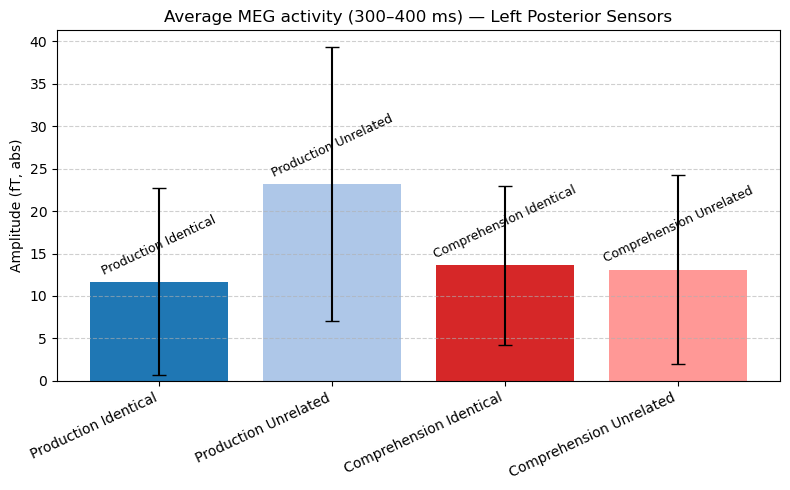

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Time window
tmin, tmax = 0.300, 0.400  # seconds

def average_ft(evoked, picks, tmin, tmax):
    """Return average amplitude (in fT) and std deviation for given time window and picks.
       Uses absolute value of activation."""
    evoked_picked = evoked.copy().pick_channels(picks)
    time_mask = (evoked_picked.times >= tmin) & (evoked_picked.times <= tmax)

    # Convert Tesla → femtotesla and take absolute value
    data_ft = np.abs(evoked_picked.data * 1e15)

    # Mean and std over time points & channels
    mean_val = np.mean(data_ft[:, time_mask])
    std_val = np.std(data_ft[:, time_mask])
    return mean_val, std_val


conditions = [
    ("Production Identical", prod_ident),
    ("Production Unrelated", prod_unrel),
    ("Comprehension Identical", comp_ident),
    ("Comprehension Unrelated", comp_unrel)
]

colors = ["#1f77b4","#aec7e8","#d62728","#ff9896" ]

# Compute means and stds
means, stds, labels = [], [], []
for label, evk in conditions:
    m, s = average_ft(evk, left_post, tmin, tmax)
    means.append(m)
    stds.append(s)
    labels.append(label)

# Plot bars
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(means))

bars = ax.bar(x, means, yerr=stds, capsize=5, color=colors)

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=25, ha='right')

# Add value labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{labels[i]}",
            ha='center', va='bottom', fontsize=9, rotation=25)

ax.set_ylabel('Amplitude (fT, abs)')
ax.set_title('Average MEG activity (300–400 ms) — Left Posterior Sensors')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

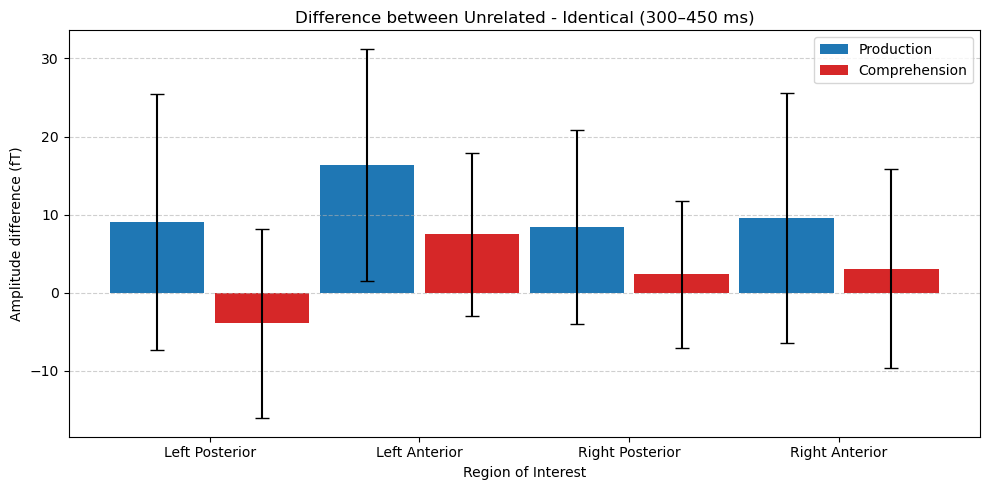

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time window
tmin, tmax = 0.350, 0.400  # seconds

def mean_difference(evoked_ident, evoked_unrel, picks, tmin, tmax):
    """Compute mean difference (Unrel - Ident) in fT for given sensors and time window."""
     # Convert Tesla → femtotesla and take absolute value

    ident_data = np.abs(evoked_ident.copy().pick_channels(picks).data * 1e15)
    unrel_data = np.abs(evoked_unrel.copy().pick_channels(picks).data * 1e15)

    mask = (evoked_ident.times >= tmin) & (evoked_ident.times <= tmax)
    ident_window = ident_data[:, mask]
    unrel_window = unrel_data[:, mask]

    diff = unrel_window - ident_window
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    return mean_diff, std_diff

# ROIs
rois = {
    "Left Posterior": left_post,
    "Left Anterior": left_ant,
    "Right Posterior": right_post,
    "Right Anterior": right_ant
}

# Colors
prod_color = "#1f77b4"  # Production = blue
comp_color = "#d62728"  # Comprehension = red

# Prepare data
means = []
stds = []
bar_colors = []
roi_positions = []

for i, (roi_name, picks) in enumerate(rois.items()):
    m_prod, s_prod = mean_difference(prod_ident, prod_unrel, picks, tmin, tmax)
    m_comp, s_comp = mean_difference(comp_ident, comp_unrel, picks, tmin, tmax)

    means.extend([m_prod, m_comp])
    stds.extend([s_prod, s_comp])
    bar_colors.extend([prod_color, comp_color])
    roi_positions.append(i*2 + 0.5)

# X positions
x = np.arange(len(means))

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, means, yerr=stds, capsize=5, color=bar_colors, width=0.9)

# Set ROI labels
ax.set_xticks(roi_positions)
ax.set_xticklabels(rois.keys())
ax.set_xlabel('Region of Interest')
ax.set_ylabel('Amplitude difference (fT)')
ax.set_title('Difference between Unrelated - Identical (300–450 ms)')

# Add legend manually using the first occurrence of each color
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=prod_color, label='Production'),
    Patch(facecolor=comp_color, label='Comprehension')
]
ax.legend(handles=legend_elements)

ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


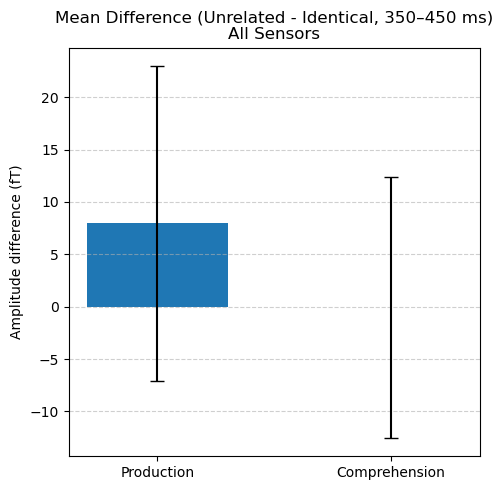

In [86]:

def mean_difference_all(evoked_ident, evoked_unrel, tmin, tmax):
    """Compute mean difference (Unrel - Ident) in fT for given sensors and time window."""
     # Convert Tesla → femtotesla and take absolute value

    ident_data = np.abs(evoked_ident.copy().data * 1e15)
    unrel_data = np.abs(evoked_unrel.copy().data * 1e15)

    mask = (evoked_ident.times >= tmin) & (evoked_ident.times <= tmax)
    ident_window = ident_data[:, mask]
    unrel_window = unrel_data[:, mask]

    diff = unrel_window - ident_window
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    return mean_diff, std_diff

# Compute differences across all sensors
m_prod, s_prod = mean_difference_all(prod_ident, prod_unrel, tmin, tmax)
m_comp, s_comp = mean_difference_all(comp_ident, comp_unrel, tmin, tmax)

# Plot
means = [m_prod, m_comp]
stds = [s_prod, s_comp]
labels = ['Production', 'Comprehension']
colors = ['#1f77b4', '#d62728']  # blue = production, red = comprehension

fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(labels, means, yerr=stds, capsize=5, color=colors, width=0.6)

ax.set_ylabel('Amplitude difference (fT)')
ax.set_title('Mean Difference (Unrelated - Identical, 350–450 ms)\nAll Sensors')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
